# A cloth manufacturing company is interested to know about the segment or attributes causes high sale 

In [1]:
import pandas as pd
import seaborn as sb
from sklearn import preprocessing ,metrics,tree
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import *


In [2]:
data=pd.read_csv("Company_Data.csv")
data.shape

(400, 11)

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
data['ShelveLoc']=data['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})

In [5]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,3,42,17,Yes,Yes
1,11.22,111,48,16,260,83,1,65,10,Yes,Yes
2,10.06,113,35,10,269,80,2,59,12,Yes,Yes
3,7.40,117,100,4,466,97,2,55,14,Yes,Yes
4,4.15,141,64,3,340,128,3,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,Yes,Yes
396,6.14,139,23,3,37,120,2,55,11,No,Yes
397,7.41,162,26,12,368,159,2,40,18,Yes,Yes
398,5.94,100,79,7,284,95,3,50,12,Yes,Yes


In [6]:
median=data['Sales'].median()

In [7]:
data['Sales']=['High'if value >median
              else 'low' for value in data['Sales']]

In [8]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,3,42,17,Yes,Yes
1,High,111,48,16,260,83,1,65,10,Yes,Yes
2,High,113,35,10,269,80,2,59,12,Yes,Yes
3,low,117,100,4,466,97,2,55,14,Yes,Yes
4,low,141,64,3,340,128,3,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,Yes,Yes
396,low,139,23,3,37,120,2,55,11,No,Yes
397,low,162,26,12,368,159,2,40,18,Yes,Yes
398,low,100,79,7,284,95,3,50,12,Yes,Yes


In [9]:
data.Sales.value_counts()

low     201
High    199
Name: Sales, dtype: int64

In [10]:
data=pd.get_dummies(data,columns=["Urban","US"],drop_first=True)

In [11]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,High,138,73,11,276,120,3,42,17,1,1
1,High,111,48,16,260,83,1,65,10,1,1
2,High,113,35,10,269,80,2,59,12,1,1
3,low,117,100,4,466,97,2,55,14,1,1
4,low,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,1,33,14,1,1
396,low,139,23,3,37,120,2,55,11,0,1
397,low,162,26,12,368,159,2,40,18,1,1
398,low,100,79,7,284,95,3,50,12,1,1


In [12]:
x=data.iloc[:,1:]
y=data.iloc[:,0]
y

0      High
1      High
2      High
3       low
4       low
       ... 
395    High
396     low
397     low
398     low
399    High
Name: Sales, Length: 400, dtype: object

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30)

In [14]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
313,103,81,3,491,54,2,66,13,1,0
21,134,29,12,239,109,1,62,18,0,1
222,136,119,6,178,145,2,35,13,1,1
350,111,101,17,266,91,2,63,17,0,1
398,100,79,7,284,95,3,50,12,1,1
...,...,...,...,...,...,...,...,...,...,...
309,131,111,13,33,80,3,68,18,1,1
386,152,116,0,170,160,2,39,16,1,0
140,133,60,10,277,129,2,45,18,1,1
301,99,93,0,198,87,2,57,16,1,1


In [15]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
35,131,84,11,29,96,2,44,17,0,1
316,122,36,5,369,72,1,35,10,1,1
281,122,69,7,303,105,1,45,16,0,1
74,150,68,5,125,136,2,64,13,0,1
296,127,44,13,160,123,1,63,18,1,1
...,...,...,...,...,...,...,...,...,...,...
188,116,37,0,426,90,2,76,15,1,0
245,114,43,0,199,88,1,57,10,0,1
118,112,88,2,243,99,2,62,11,1,1
272,113,33,0,14,63,1,38,12,1,0


In [16]:
y_test

35     High
316    High
281    High
74      low
296    High
       ... 
188    High
245    High
118    High
272    High
365     low
Name: Sales, Length: 80, dtype: object

In [17]:
y_train

313    High
21     High
222     low
350    High
398     low
       ... 
309    High
386     low
140     low
301     low
293    High
Name: Sales, Length: 320, dtype: object

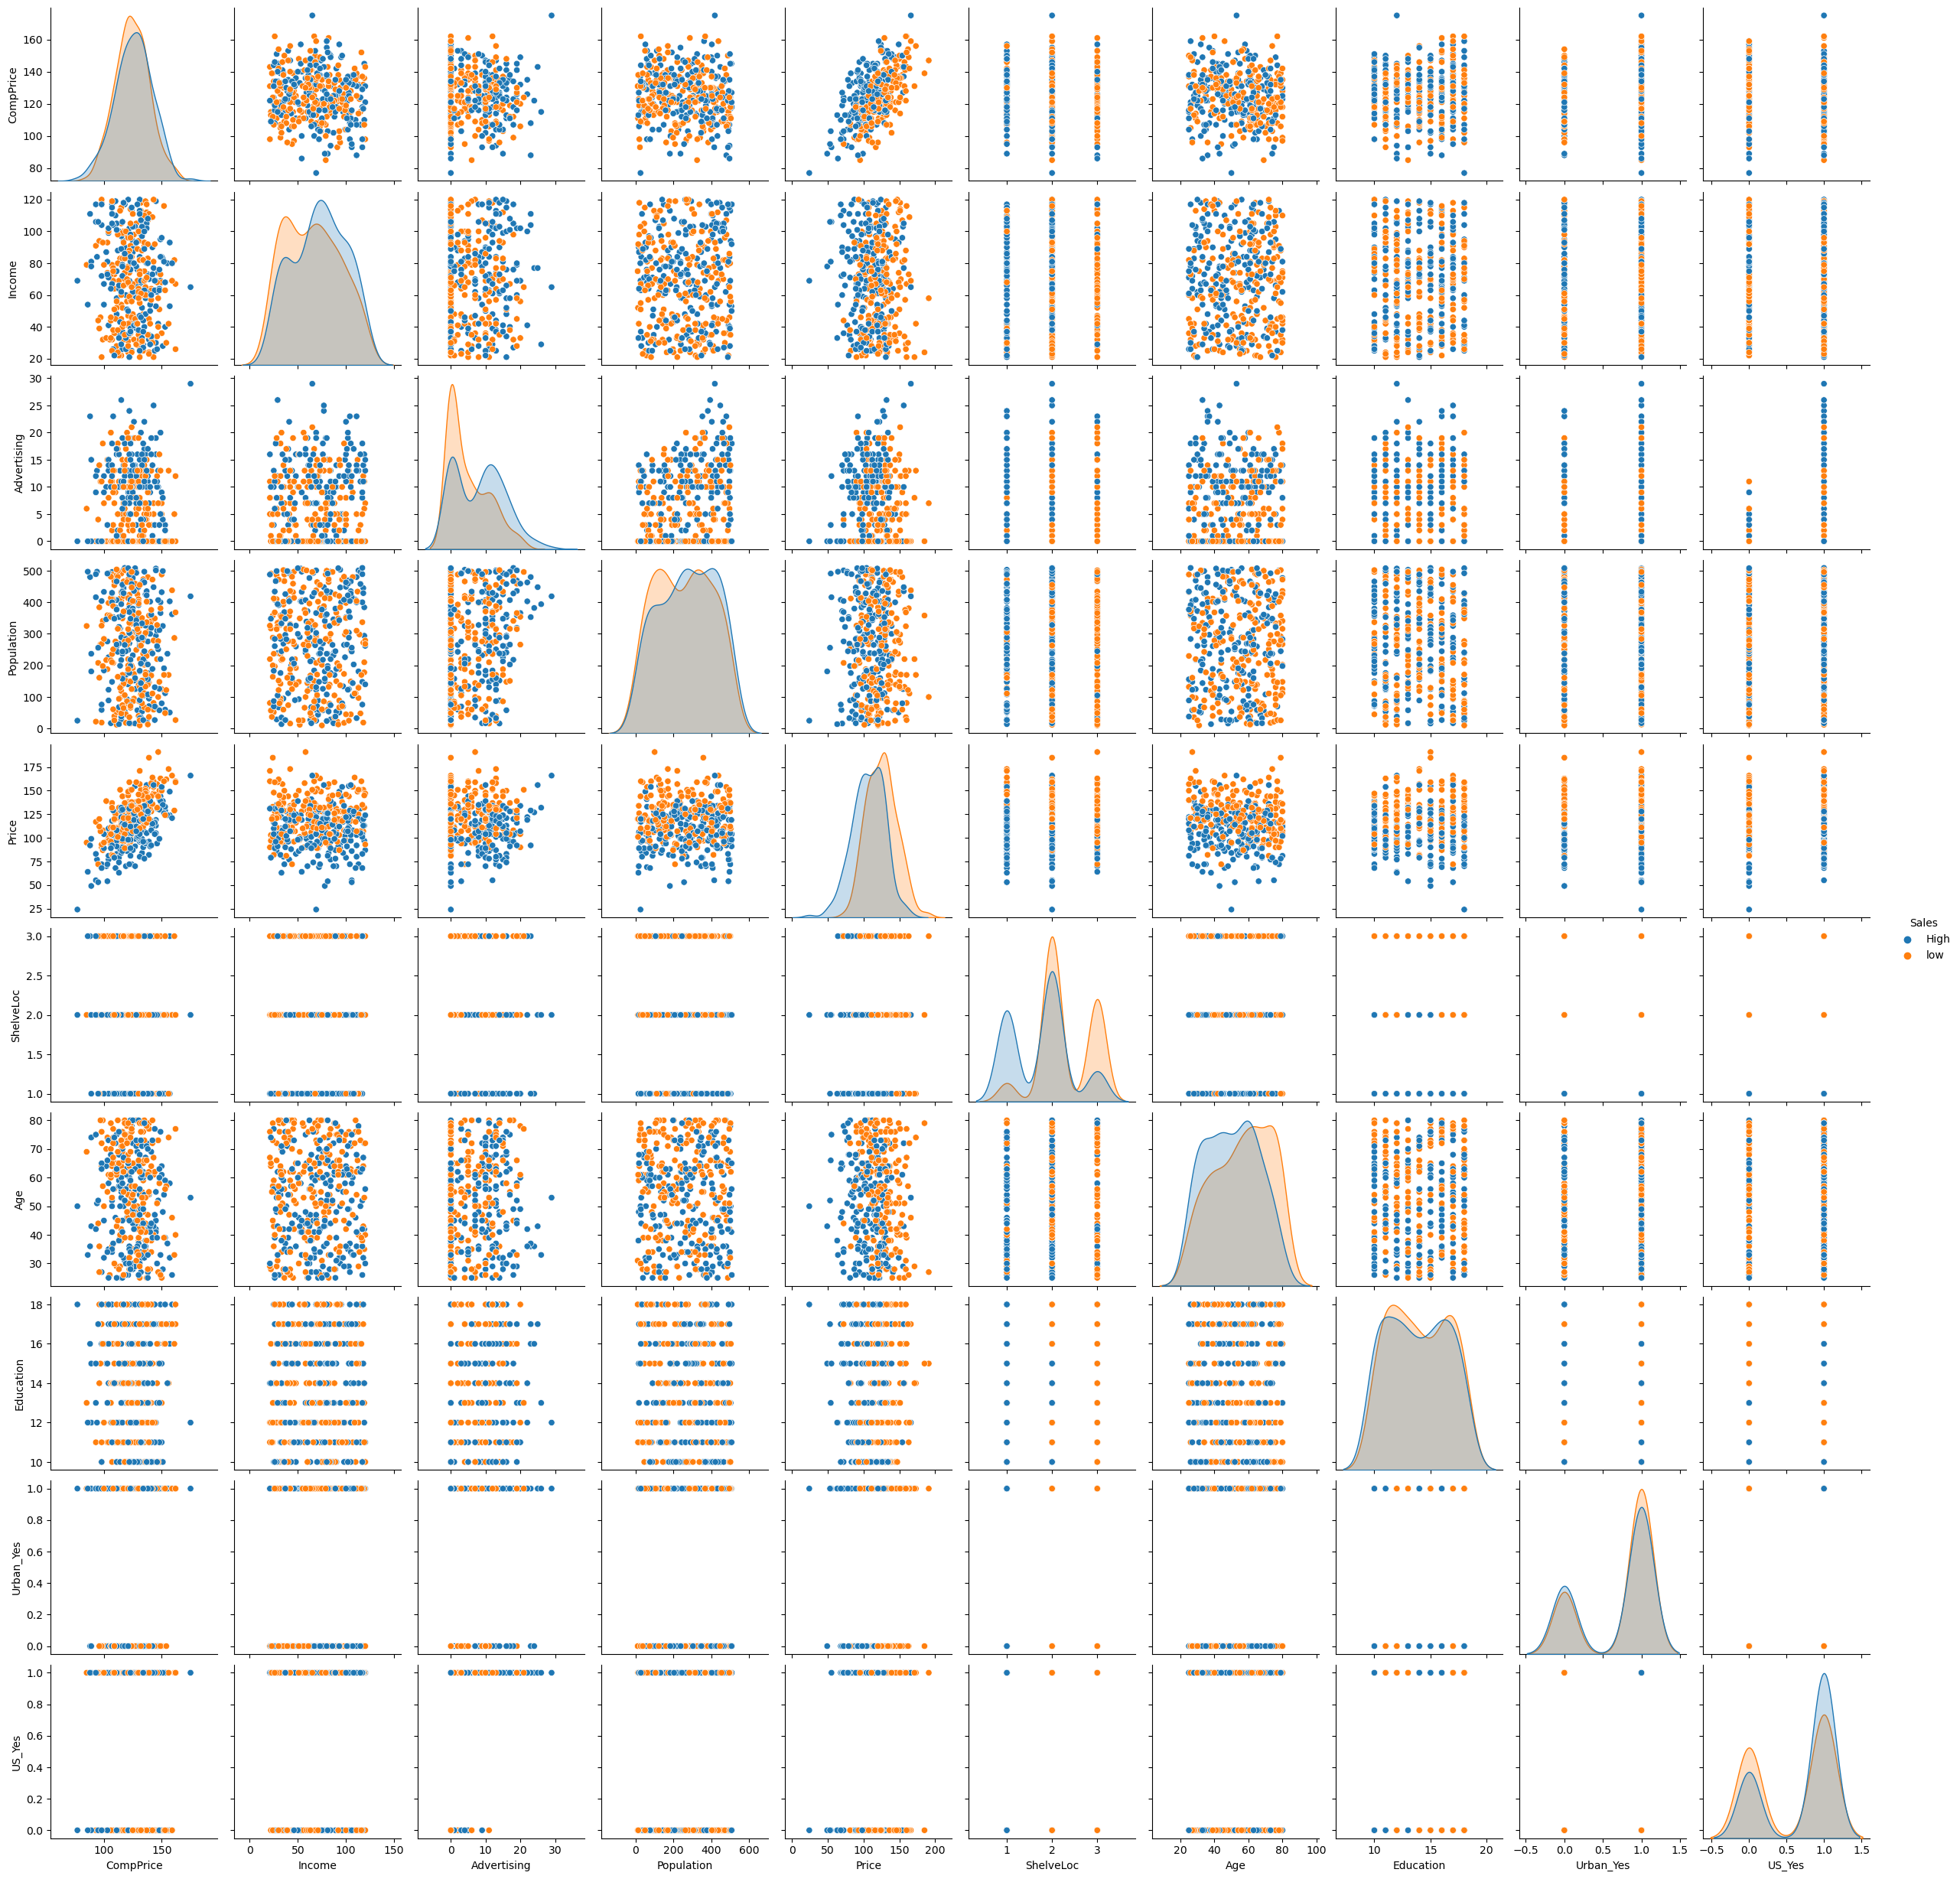

In [18]:
sb.pairplot(data=data, hue = 'Sales')

In [19]:
#scale=MinMaxScaler(feature_range=(0,1)).fit(x_train)
#x_train=scale.transform(x_train)
#x_test=scale.transform(x_test)

In [29]:
clf=DecisionTreeClassifier(criterion="gini",max_depth=4,min_samples_split=10)

In [30]:
clf=clf.fit(x_train,y_train)

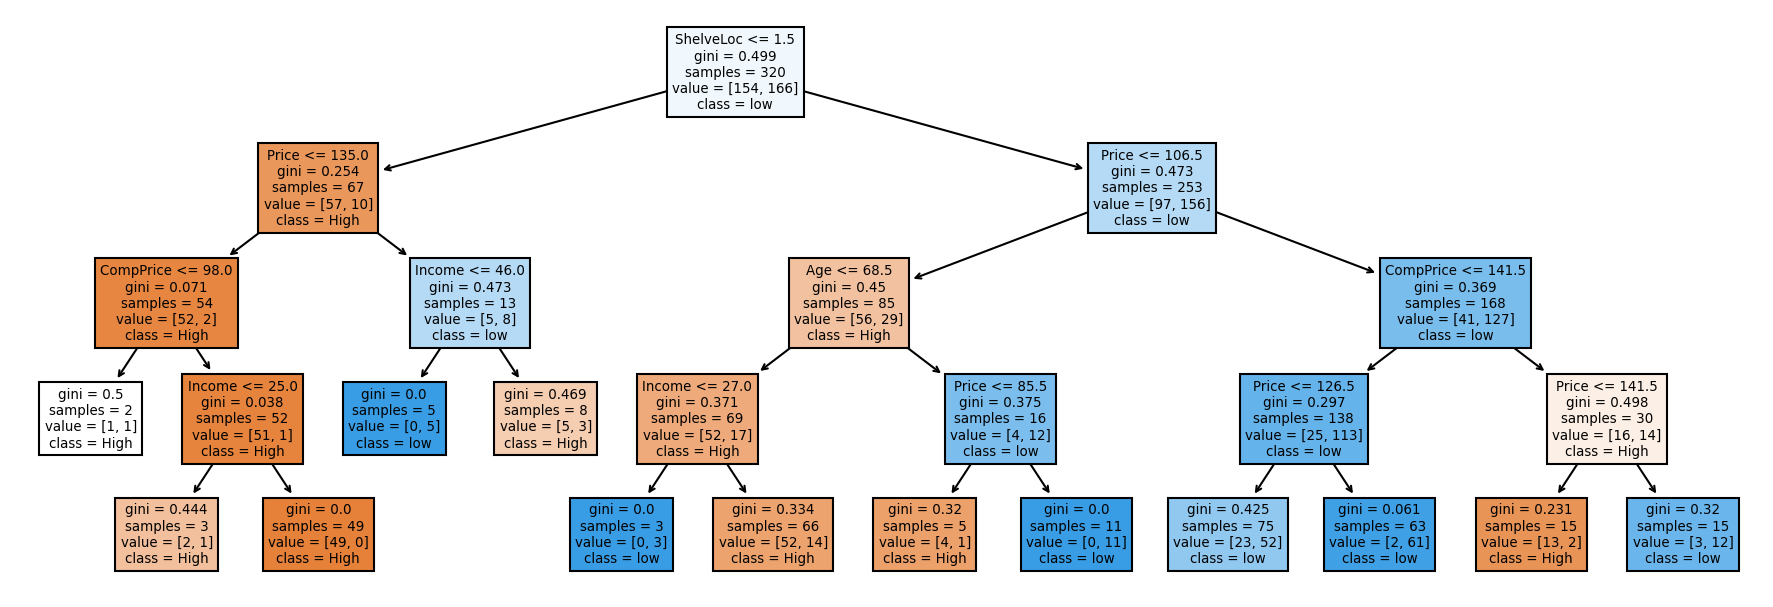

In [31]:
fn=["CompPrice","Income","Advertising","Population","Price","ShelveLoc","Age","Education","Urban_Yes","US_Yes"]
cn=["High","low"]
plt.figure(figsize=(15,5),dpi=150)
tree.plot_tree(clf,filled=True,feature_names=fn,class_names=cn)
plt.show()

In [32]:
z=clf.predict(x_test)

In [33]:
print(classification_report(y_test,z))

              precision    recall  f1-score   support

        High       0.80      0.62      0.70        45
         low       0.62      0.80      0.70        35

    accuracy                           0.70        80
   macro avg       0.71      0.71      0.70        80
weighted avg       0.72      0.70      0.70        80



In [34]:
metrics.accuracy_score(z,y_test)

0.7

# 2 Use decision trees to prepare a model on fraud 

In [160]:
data=pd.read_csv("Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [161]:
def x(row):
    if row["Taxable.Income"]<=30000:
        return'0'
    else:
        return'1'
data['Status']=data.apply(x,axis=1)

In [162]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Status
0,NO,Single,68833,50047,10,YES,1
1,YES,Divorced,33700,134075,18,YES,1
2,NO,Married,36925,160205,30,YES,1
3,YES,Single,50190,193264,15,YES,1
4,NO,Married,81002,27533,28,NO,1
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,1
596,YES,Divorced,69967,55369,2,YES,1
597,NO,Divorced,47334,154058,0,YES,1
598,YES,Married,98592,180083,17,NO,1


In [163]:
data=pd.get_dummies(data,drop_first=True)

In [164]:
data

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Status_1
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [165]:
data.drop(["Taxable.Income"],axis=1,inplace=True)


In [166]:
data

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Status_1
0,50047,10,0,0,1,1,1
1,134075,18,1,0,0,1,1
2,160205,30,0,1,0,1,1
3,193264,15,1,0,1,1,1
4,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...
595,39492,7,1,0,0,1,1
596,55369,2,1,0,0,1,1
597,154058,0,0,0,0,1,1
598,180083,17,1,1,0,0,1


In [167]:
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [168]:
data_norm=norm_fun(data.iloc[:,:])

In [169]:
data_norm

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Status_1
0,0.139472,0.333333,0.0,0.0,1.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0,1.0


In [170]:
x=data_norm.iloc[:,:-1]
y=data_norm.iloc[:,-1]
x

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
595,0.078811,0.233333,1.0,0.0,0.0,1.0
596,0.170058,0.066667,1.0,0.0,0.0,1.0
597,0.737240,0.000000,0.0,0.0,0.0,1.0
598,0.886810,0.566667,1.0,1.0,0.0,0.0


In [179]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=150)

In [180]:
clf=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=5)

In [181]:
clf=clf.fit(x_train,y_train)

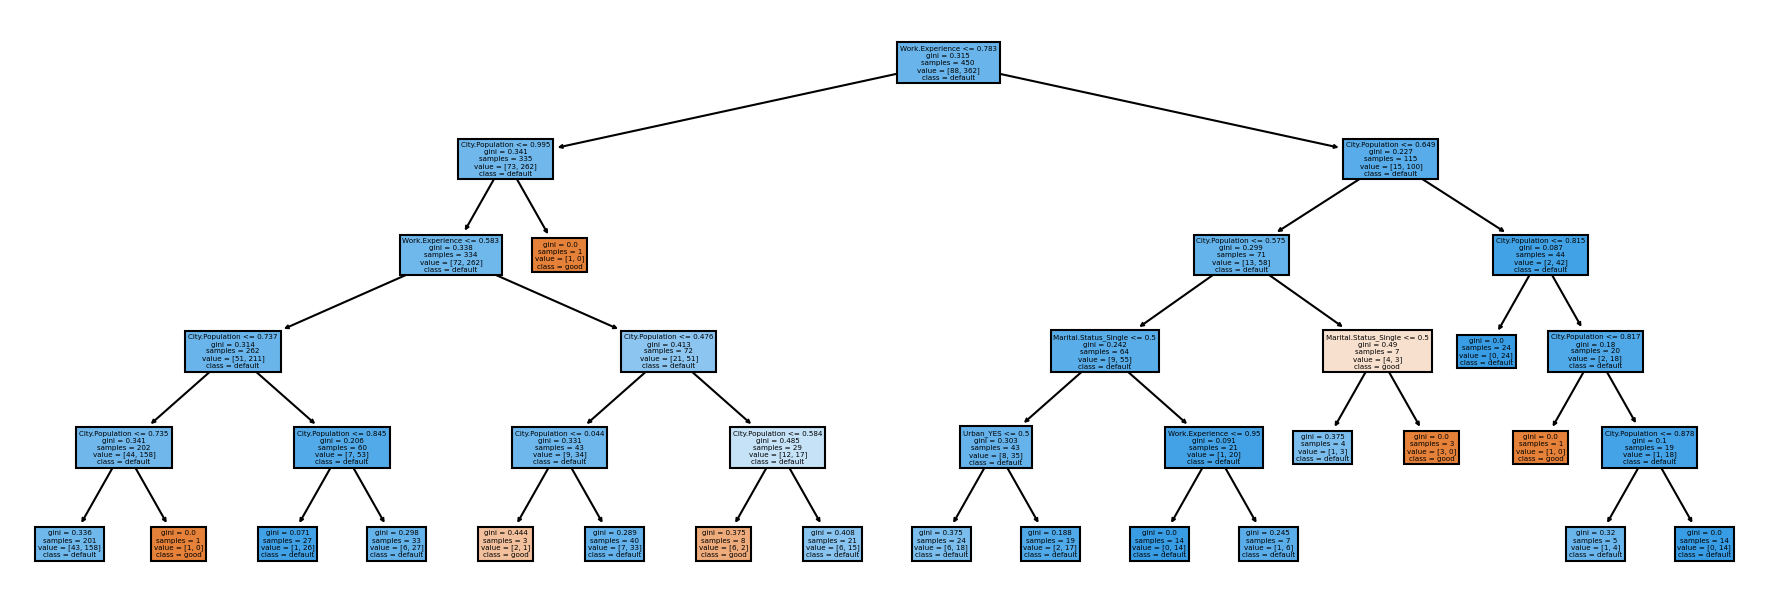

In [182]:
fn=["City.Population","Work.Experience","Undergrad_YES","Marital.Status_Married","Marital.Status_Single","Urban_YES"]
cn=["good","default"]
plt.figure(figsize=(15,5),dpi=150)
plot_tree(clf,filled=True,feature_names=fn,class_names=cn)
plt.show()

In [183]:
z=clf.predict(x_test)

In [184]:
z

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

In [185]:
print(classification_report(y_test,z))

              precision    recall  f1-score   support

         0.0       0.17      0.03      0.05        36
         1.0       0.76      0.96      0.84       114

    accuracy                           0.73       150
   macro avg       0.46      0.49      0.45       150
weighted avg       0.62      0.73      0.65       150



In [186]:
metrics.accuracy_score(y_test,z)

0.7333333333333333